# PFIZER TWEETS - EDA


# First import all the relevant libraries.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [20]:
pfizer=pd.read_csv('E:/dataset/vaccination_tweets.csv')

In [21]:
pfizer.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [23]:
pfizer.shape

(3514, 16)

In [26]:
pfizer.isnull().mean()*100

id                   0.000000
user_name            0.000000
user_location       21.058623
user_description     6.146841
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
text                 0.000000
hashtags            26.180990
source               0.028458
retweets             0.000000
favorites            0.000000
is_retweet           0.000000
dtype: float64

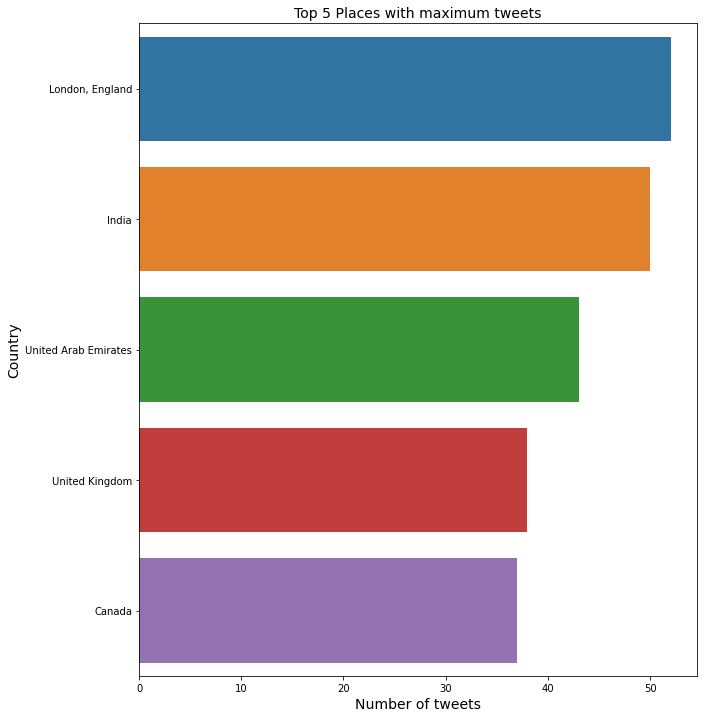

In [24]:
plt.figure(figsize=(10,12))
sns.barplot(pfizer["user_location"].value_counts().values[0:5],
            pfizer["user_location"].value_counts().index[0:5]);
plt.title("Top 5 Places with maximum tweets",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.show()

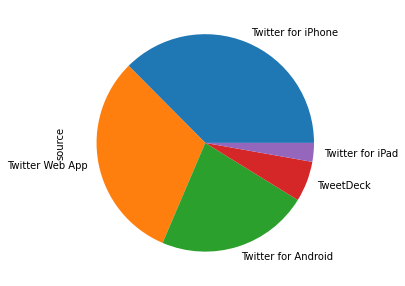

In [25]:
pfizer["source"].value_counts()[:5].plot.pie(y='mass', figsize=(5, 5))

In [28]:
print(f" Data Available since {pfizer.date.min()}")
print(f" Data Available upto {pfizer.date.max()}")

 Data Available since 2020-12-12 11:55:28
 Data Available upto 2021-01-15 07:46:39


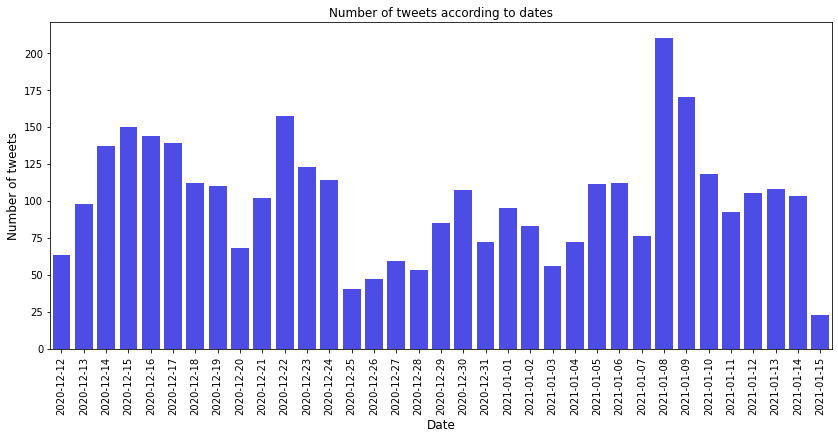

In [29]:
pfizer['date'] =  pd.to_datetime(pfizer['date'])
cnt_srs = pfizer['date'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()

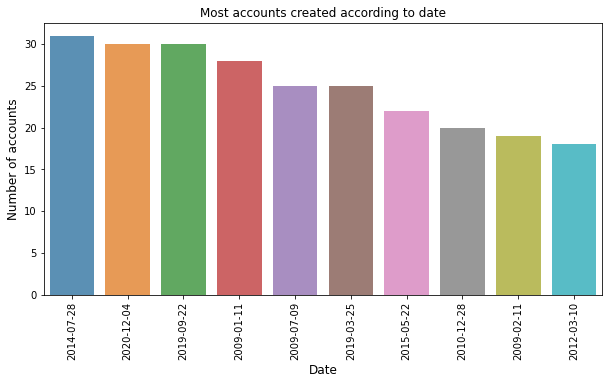

TypeError: 'NoneType' object does not support item assignment

In [31]:
pfizer['user_created'] =  pd.to_datetime(pfizer['user_created'])
count_  = pfizer['user_created'].dt.date.value_counts()
count_ = count_[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count_.index, count_.values, alpha=0.8)
plt.title('Most accounts created according to date')
plt.xticks(rotation='vertical')
plt.ylabel('Number of accounts', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()['user_created'] = pd.to_datetime(pfizer['user_created'])
count_  = pfizer['user_created'].dt.date.value_counts()
count_ = count_[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count_.index, count_.values, alpha=0.8)
plt.title('Most accounts created according to date')
plt.xticks(rotation='vertical')
plt.ylabel('Number of accounts', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()

##### A large number of accounts on 4th Dec, right around the time Pfizer launched its vaccine. 

In [32]:
#most favourite and retweeted tweet
print(f" Maximum number of retweets {pfizer.retweets.max()}")
print(f" Maximum number of favorites {pfizer.favorites.max()}")

 Maximum number of retweets 446
 Maximum number of favorites 2129


# WORDCLOUD

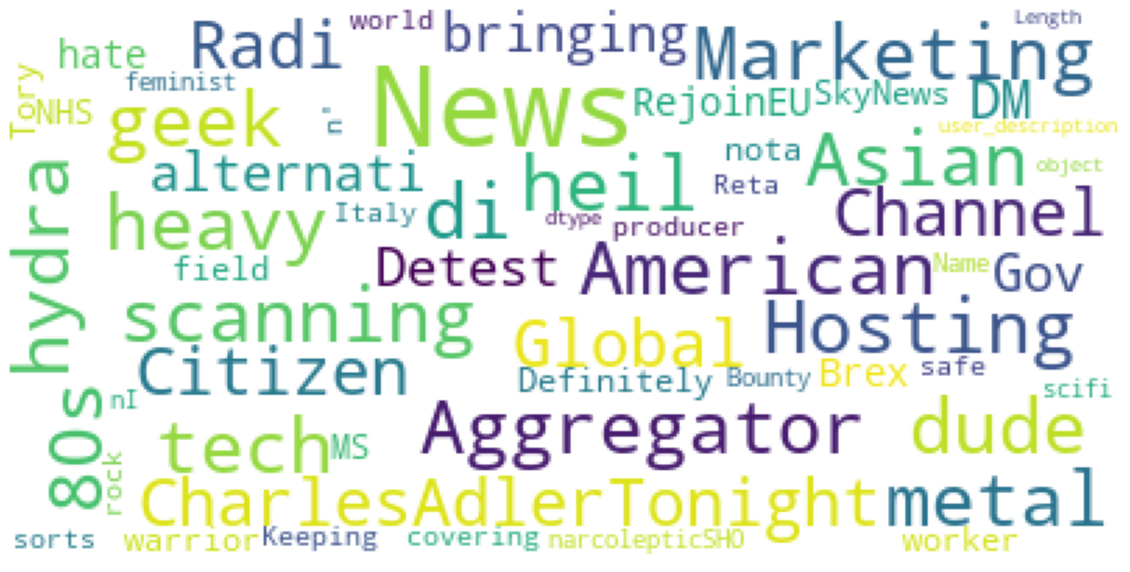

In [34]:
wordcloud_ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(pfizer['user_description'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

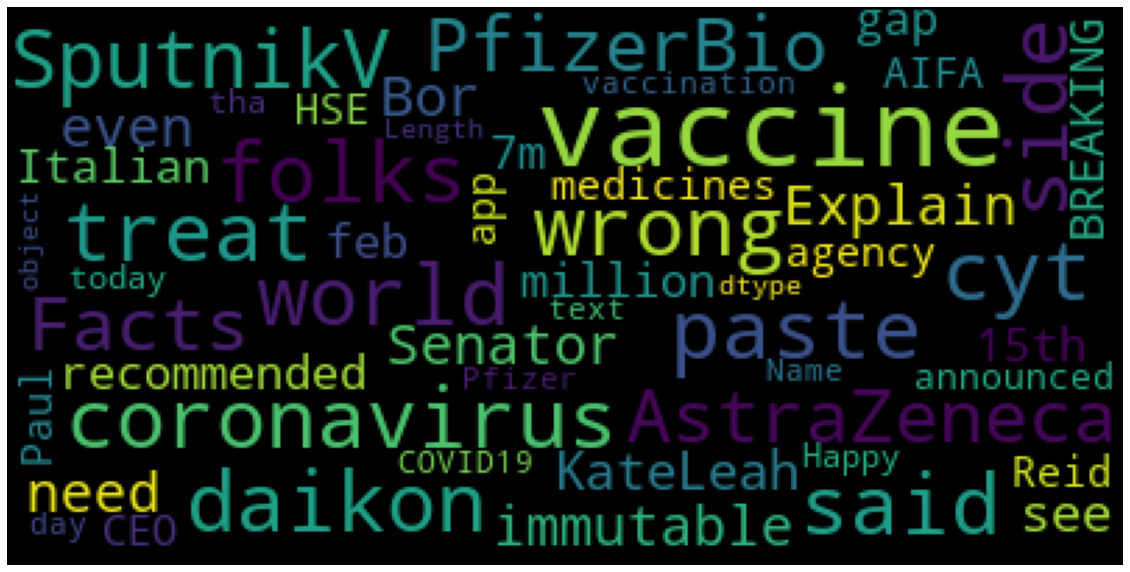

In [35]:
wordcloud_ = WordCloud(
                          background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(pfizer['text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

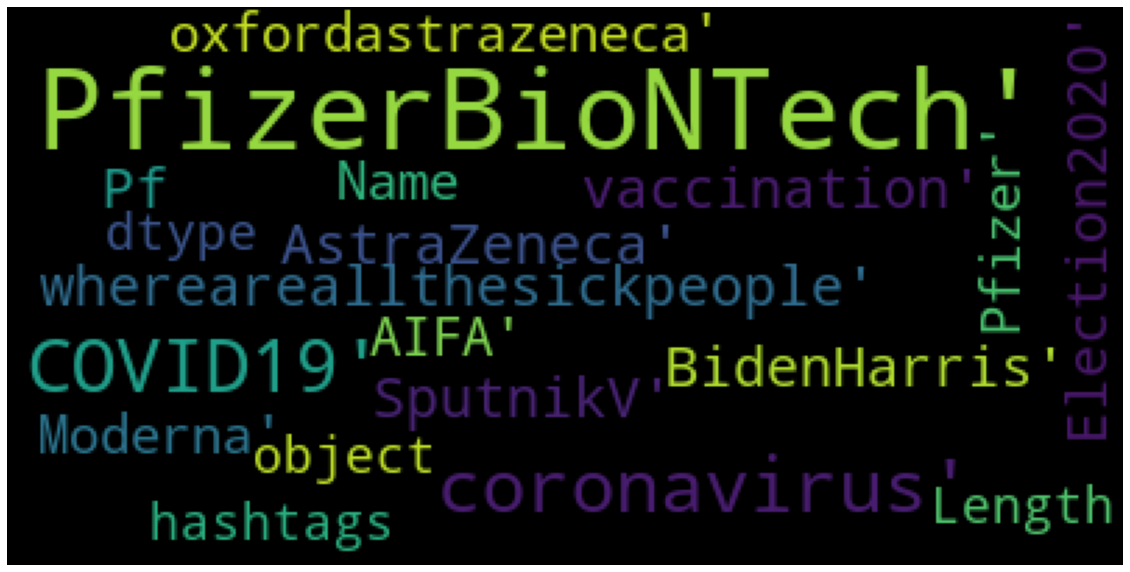

In [36]:
wordcloud_ = WordCloud(
                          background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(pfizer['hashtags'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)